# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 10 submission</b></u>

### Roster Name: Sina Kalantar
### Preferred Name (if different): N/A
### Student ID: 015146365
### Email address: sina.kalantar@sjsu.edu


##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from numpy import vstack
from numpy import asarray
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

mnist = np.concatenate([x_train, x_test], axis=0)
mnist = expand_dims(mnist, axis=-1)

mnist = mnist.astype("float32") / 255
mnist.shape

4431872/4422102 [==============================] - 0s 0us/step


(70000, 28, 28, 1)

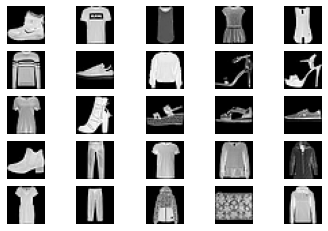

In [4]:
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
plt.show()

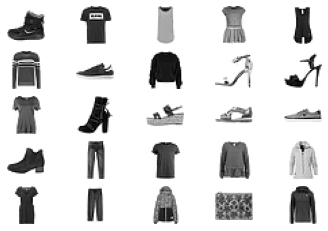

In [5]:
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray_r')
plt.show()

In [6]:
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

discriminator = define_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (1,1), strides=(1,1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

latent_dim = 100
generator = define_generator(latent_dim)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 128)      16512     
 ranspose)                                            

In [8]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

gan_model = define_gan(generator, discriminator)
gan_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         1180801   
                                                                 
 sequential (Sequential)     (None, 1)                 143169    
                                                                 
Total params: 1,323,970
Trainable params: 1,180,801
Non-trainable params: 143,169
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


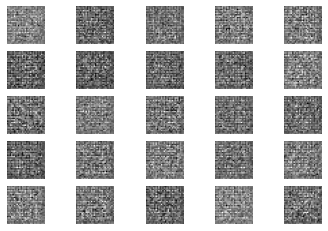

In [9]:
def generate_latent_points(latent_dim, n_samples):

    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_generator_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

n_samples = 25
X, _ = generate_fake_generator_samples(generator, latent_dim, n_samples)
for i in range(n_samples):
    
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(X[i, :, :, 0], cmap='gray_r')
plt.show()

In [10]:
def generate_real_samples(dataset, n_samples):
    
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y
 
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):

    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
   
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
        
        for j in range(bat_per_epo):
            
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            d_loss, _ = d_model.train_on_batch(X, y)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d_loss=%.3f, g_loss=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    summarize_performance(i, g_model, d_model, dataset, latent_dim)
            
    return g_model

In [11]:
latent_dim = 100
trained_generator = train(generator, discriminator, gan_model, mnist, latent_dim, 10)

>1, 1/273, d_loss=0.687, g_loss=0.736
>1, 2/273, d_loss=0.682, g_loss=0.748
>1, 3/273, d_loss=0.677, g_loss=0.760
>1, 4/273, d_loss=0.665, g_loss=0.776
>1, 5/273, d_loss=0.660, g_loss=0.786
>1, 6/273, d_loss=0.648, g_loss=0.799
>1, 7/273, d_loss=0.643, g_loss=0.811
>1, 8/273, d_loss=0.639, g_loss=0.816
>1, 9/273, d_loss=0.624, g_loss=0.817
>1, 10/273, d_loss=0.615, g_loss=0.808
>1, 11/273, d_loss=0.608, g_loss=0.789
>1, 12/273, d_loss=0.589, g_loss=0.771
>1, 13/273, d_loss=0.567, g_loss=0.746
>1, 14/273, d_loss=0.543, g_loss=0.729
>1, 15/273, d_loss=0.526, g_loss=0.707
>1, 16/273, d_loss=0.514, g_loss=0.700
>1, 17/273, d_loss=0.526, g_loss=0.720
>1, 18/273, d_loss=0.509, g_loss=0.814
>1, 19/273, d_loss=0.475, g_loss=0.942
>1, 20/273, d_loss=0.468, g_loss=1.029
>1, 21/273, d_loss=0.473, g_loss=1.008
>1, 22/273, d_loss=0.454, g_loss=0.917
>1, 23/273, d_loss=0.451, g_loss=0.811
>1, 24/273, d_loss=0.454, g_loss=0.748
>1, 25/273, d_loss=0.439, g_loss=0.713
>1, 26/273, d_loss=0.462, g_loss=0

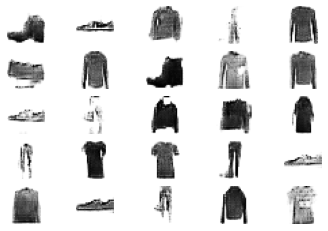

In [12]:
def generate_latent_points(latent_dim, n_samples):

    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
def display_plot(examples, n):
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

latent_points = generate_latent_points(100, 25)
X = trained_generator.predict(latent_points)
#Results 
display_plot(X, 5)